In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('stock.csv')
df

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793


In [3]:
df_2=df.drop(['Gold Investments', 'Comp Stock','Other sharesInvestments'], axis=1)
df_2

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256
...,...,...
1979,09-11-2017,0.005984
1980,10-11-2017,-0.007173
1981,13-11-2017,0.000352
1982,14-11-2017,-0.019376


In [4]:
df_2

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256
...,...,...
1979,09-11-2017,0.005984
1980,10-11-2017,-0.007173
1981,13-11-2017,0.000352
1982,14-11-2017,-0.019376


In [5]:
df_2.dtypes

Date                object
Oil Investments    float64
dtype: object

In [6]:
df_2['Date']=pd.to_datetime(df_2['Date'])

In [7]:
df_2.dtypes

Date               datetime64[ns]
Oil Investments           float64
dtype: object

In [8]:
df_2.head()

,Date,Oil Investments
0,2009-12-31,0.025417
1,2010-04-01,0.026830
2,2010-05-01,0.002699
3,2010-06-01,0.021688
4,2010-07-01,-0.006256


In [9]:
df_2.tail()

,Date,Oil Investments
1979,2017-09-11,0.005984
1980,2017-10-11,-0.007173
1981,2017-11-13,0.000352
1982,2017-11-14,-0.019376
1983,2017-11-15,-0.007006


In [10]:
df_2.set_index('Date', inplace=True)


In [11]:
df_2

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256
...,...
2017-09-11,0.005984
2017-10-11,-0.007173
2017-11-13,0.000352


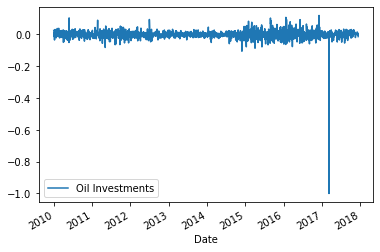

In [12]:
df_2.plot()

In [13]:
df_3=df_2.iloc[0:10]

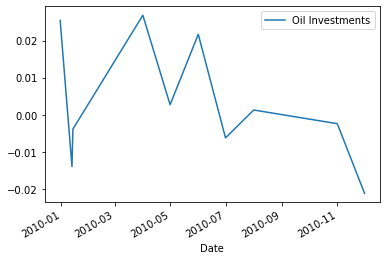

In [14]:
df_3.plot()

In [15]:
df_4=df_2.iloc[1750:1850]

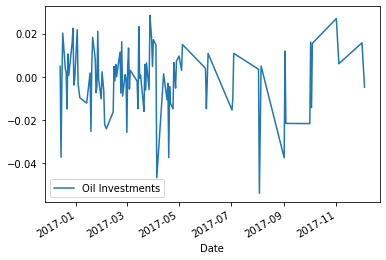

In [16]:
df_4.plot()

In [17]:
rolmean= df_2.rolling(window=12).mean()

rolstd= df_2.rolling(window=12).std()

print(rolmean, rolstd)

            Oil Investments
Date                       
2009-12-31              NaN
2010-04-01              NaN
2010-05-01              NaN
2010-06-01              NaN
2010-07-01              NaN
...                     ...
2017-09-11         0.007472
2017-10-11         0.007432
2017-11-13         0.006756
2017-11-14         0.002740
2017-11-15         0.001863

[1984 rows x 1 columns]             Oil Investments
Date                       
2009-12-31              NaN
2010-04-01              NaN
2010-05-01              NaN
2010-06-01              NaN
2010-07-01              NaN
...                     ...
2017-09-11         0.012614
2017-10-11         0.012664
2017-11-13         0.012819
2017-11-14         0.012829
2017-11-15         0.013127

[1984 rows x 1 columns]


In [18]:
df_3=df_2.iloc[0:50]
df_4=rolmean.iloc[0:50]
df_5=rolstd.iloc[0:50]

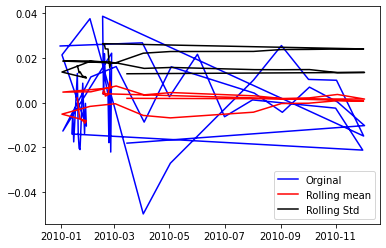

In [19]:
orgin = plt.plot(df_3, color='blue', label ='Orginal')
mean = plt.plot(df_4, color='red', label= 'Rolling mean')
std=plt.plot(df_5,color='black', label='Rolling Std')
plt.legend()
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

print('Result of Dicky Fuller Test')
df_test = adfuller(df_2['Oil Investments'], autolag='AIC')

print(f'ADF Statistic: {df_test[0]}')
print(f'nlags: {df_test[2]}')
print(f'P values: {df_test[1]}')

for key, values in df_test[4].items():
    print('Critical values')
    print(f' {key},{values},\n')



Result of Dicky Fuller Test
ADF Statistic: -45.94216292983993
nlags: 0
P values: 0.0
Critical values
 1%,-3.4336519592295947,

Critical values
 5%,-2.862998620943585,

Critical values
 10%,-2.567546508593341,



After visualizing data of oil investments from rolling test and now by getting the values from dicky fuller test 
we can see that the graph and the p values is less than 0.05 and there is no trend in the graph.
And even the critcal value should be more than ADF test statistics which we can see here it is.
So we can conclude that the data is stationary

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_1['Gold Investments'])
plt.show()

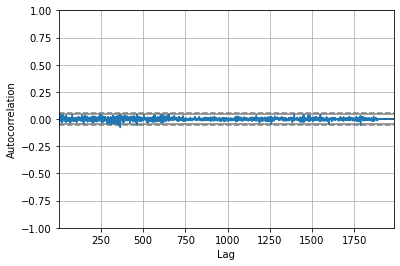

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_2['Oil Investments'])
plt.show()